In [1]:
import sys
sys.path.append('../helper_functions/')

In [7]:
import gc
import os

In [3]:
import uproot
import numpy as np
import pandas as pd
import glob
import networkx as nx
import dgl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import importlib
import file_loading
import pdg_id_dict
importlib.reload(file_loading)
importlib.reload(pdg_id_dict)

from file_loading import *
from pdg_id_dict import *

In [4]:
import importlib
import helper_functions
import graph_edm
import graph_plotting
import dataset_functions
import gnn_model
importlib.reload(helper_functions)
importlib.reload(graph_edm)
importlib.reload(graph_plotting)
importlib.reload(dataset_functions)
importlib.reload(gnn_model)

from helper_functions import *
from graph_edm import *
from graph_plotting import *
from dataset_functions import *
from gnn_model import *

In [17]:
glob.glob('/Users/jshlomi/Desktop/Datasets/j_3/*')

['/Users/jshlomi/Desktop/Datasets/j_3/f_12_cjets.pickle',
 '/Users/jshlomi/Desktop/Datasets/j_3/f_13_ujets.pickle',
 '/Users/jshlomi/Desktop/Datasets/j_3/f_13_cjets.pickle',
 '/Users/jshlomi/Desktop/Datasets/j_3/f_12_ujets.pickle',
 '/Users/jshlomi/Desktop/Datasets/j_3/f_13_bjets.pickle',
 '/Users/jshlomi/Desktop/Datasets/j_3/f_12_bjets.pickle']

In [7]:
!du -h /Users/jshlomi/Desktop/Datasets/j_4/f_17_ujets.pickle

465M	/Users/jshlomi/Desktop/Datasets/j_4/f_17_ujets.pickle


In [5]:
df_i = pd.read_pickle('/Users/jshlomi/Desktop/Datasets/j_4/f_17_bjets.pickle')

In [12]:
os.path.basename('/Users/jshlomi/Desktop/Datasets/j_4/f_17_bjets.pickle')[:-7]

'f_17_bjets'

In [6]:
df_i.memory_usage(deep=True)

Index                  814136
graph                 4070680
eventnb                814136
actmu                  814136
jet_index              814136
jet_pt                 814136
jet_eta                814136
jet_DoubleHadLabel     814136
dtype: int64

In [7]:
len(df_i)

101767

In [8]:
glist = [x for x in df_i.graph]

In [9]:
df_i = df_i.drop(['graph'], axis=1)

In [10]:
create_dgl( glist[8].get_reco_graph() ).keys()

dict_keys(['graph', 'flav', 'pt_eta', 'node_features', 'node_labels', 'edge_labels'])

In [14]:
def convert_file(fname):
    
    df_i = pd.read_pickle(fname)
    glist = [x for x in df_i.graph]
    df_i = df_i.drop(['graph'], axis=1)
    
    n_features = []
    n_labels = []

    for i in range(len(glist)):
        if i % 5000 == 0:
            print(i)
        dgl_i = create_dgl( glist[i].get_reco_graph() )
        n_features.append(dgl_i['node_features'])
        n_labels.append(dgl_i['node_labels'])
        
    df_i['node_features'] = [x.data.numpy() for x in n_features]
    df_i['node_labels'] = [x.data.numpy() for x in n_labels]
    
    df_i.to_hdf(os.path.basename(fname)[:-7]+'.h5',key='df')
    

In [19]:
for fname in glob.glob('/Users/jshlomi/Desktop/Datasets/j_3/*'):
    convert_file(fname)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [4]:
graph_df = pd.concat( [pd.read_pickle(x) for x in glob.glob('/Users/jshlomi/Desktop/Datasets/j_4/*')] )

In [17]:
df_i['node_features'] = [x.data.numpy() for x in n_features]
df_i['node_labels'] = [x.data.numpy() for x in n_labels]

In [18]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101767 entries, 0 to 0
Data columns (total 8 columns):
eventnb               101767 non-null float64
actmu                 101767 non-null float64
jet_index             101767 non-null int64
jet_pt                101767 non-null float64
jet_eta               101767 non-null float64
jet_DoubleHadLabel    101767 non-null int64
node_features         101767 non-null object
node_labels           101767 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 7.0+ MB


In [21]:
df_i.to_hdf('test.h5',key='df')

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['node_features', 'node_labels']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [5]:
df_i = pd.read_hdf('test.h5')

In [6]:
df_i

,eventnb,actmu,jet_index,jet_pt,jet_eta,jet_DoubleHadLabel,node_features,node_labels
0,374672523.0,23.0,6,20455.300781,-2.439840,5,"[[537.67224, -0.0868947, -0.08575548, 29.73025...","[0, 0, 0, 0, 2, 0, 0, 0]"
0,335801386.0,21.0,7,20527.683594,-2.401576,5,"[[2849.4578, -19.322102, 19.307457, 8.109674, ...","[0, 3, 0, 3, 2, 0]"
0,339020865.0,15.0,5,20662.048828,-2.407567,5,"[[969.93463, -0.1922895, -0.17928883, 35.23100...","[0, 0, 2, 1, 0, 3, 0, 0]"
0,339045870.0,31.0,6,20225.113281,-2.493184,5,"[[1748.8486, -0.43932858, 0.44665313, 0.006834...","[3, 0, 3, 0, 2, 0]"
0,340216248.0,28.0,5,20164.908203,-2.408214,5,"[[1721.0725, 0.06478406, 0.07638735, 1.6631126...","[2, 2, 2, 2, 0, 2, 0]"
0,340232862.0,15.0,9,20391.765625,-2.490672,5,"[[551.7835, -0.023913207, -0.026317673, 37.521...","[0, 0, 0, 1, 1, 1]"
0,346823319.0,19.0,4,20660.621094,-2.438652,5,"[[3257.5845, 0.09365163, -0.07722314, 0.592998...","[1, 2, 0, 0, 0, 0, 0]"
0,346824616.0,21.0,8,20760.292969,-2.423998,5,"[[11204.255, 0.0103100445, 0.012716724, -1.231...","[2, 0, 2]"
0,346826000.0,40.0,7,20236.369141,-2.422040,5,"[[1092.9368, 0.30744937, -0.31235176, -3.33814...","[0, 0, 2, 0, 0, 3, 1, 1, 1, 1, 4, 0, 3, 0, 2, ..."
0,346837590.0,25.0,6,20766.984375,-2.492789,5,"[[545.87366, 0.06004437, 0.05866018, -41.98510...","[0, 0, 3, 2, 4, 0, 0, 0]"


In [8]:
import pickle

In [19]:
f = open('testsave.pkl','wb')
pickle.dump(glist, f)
f.close()

In [9]:
f = open("testsave.pkl", "rb")
glist = pickle.load(f)

In [10]:
gc.collect()

495

In [6]:
len( np.where( graph_df.jet_DoubleHadLabel.values == 0 )[0] )

203275

In [ ]:
graph_df_valid = pd.concat( [pd.read_pickle(x) for x in glob.glob('/Users/jshlomi/Desktop/Datasets/j_3/*')] )

In [13]:
ds = JetGraphDataset([graph_df])
ds_valid = JetGraphDataset([graph_df_valid])

In [14]:
dataset_loader = torch.utils.data.DataLoader(ds,
                                             batch_size=3, shuffle=True,collate_fn=create_batch,
                                             num_workers=1)

dataset_loader_valid = torch.utils.data.DataLoader(ds_valid,
                                             batch_size=3, shuffle=False,collate_fn=create_batch,
                                             num_workers=1)

In [508]:
for x,y in dataset_loader:
    break

In [290]:
y

tensor([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0,
        4, 0, 2, 4, 3, 0, 0, 2, 0, 0, 3, 3, 0, 4, 0, 0, 0, 1, 4])

In [291]:
len(x)

3

In [205]:
x[0].shape

torch.Size([46, 2])

In [206]:
x[1]

DGLGraph(num_nodes=46, num_edges=404,
         ndata_schemes={}
         edata_schemes={})

In [207]:
x[2].shape

torch.Size([46, 8])

In [654]:
import importlib
import gnn_model
importlib.reload(gnn_model)

from gnn_model import *

In [655]:
ce_loss = nn.CrossEntropyLoss(reduction='mean')

def loss_function(node_class,node_labels):
    
    batch_s = len(node_class)
    
    total_loss = ce_loss(node_class,node_labels)
    
    return total_loss

In [656]:
j_gnn = JetNodeClassifier(hidden_size=256,n_classes=9)

In [657]:
for x,y in dataset_loader:
    break
    
jet_features = x[0]
g = x[1]
node_features = x[2]

In [658]:
output = j_gnn(jet_features,g,node_features)

In [659]:
loss_function(output,y)

tensor(2.2189, grad_fn=<NllLossBackward>)

In [641]:
import fastai
from fastai import *
from fastai.vision import *

In [642]:
db = DataBunch(train_dl=dataset_loader,valid_dl=dataset_loader_valid,collate_fn=create_batch,fix_dl=dataset_loader)

In [643]:
learn = Learner(db,j_gnn,loss_func=loss_function)

In [644]:
learn.fit(10,lr=1e-03)

epoch,train_loss,valid_loss,time
0,0.860711,6.012752,01:06
1,0.770433,1.360710,01:08
2,0.756532,1.230393,01:06
3,0.707398,0.987400,01:14
4,0.738092,1.055840,01:03
5,0.705416,1.112777,01:03


Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

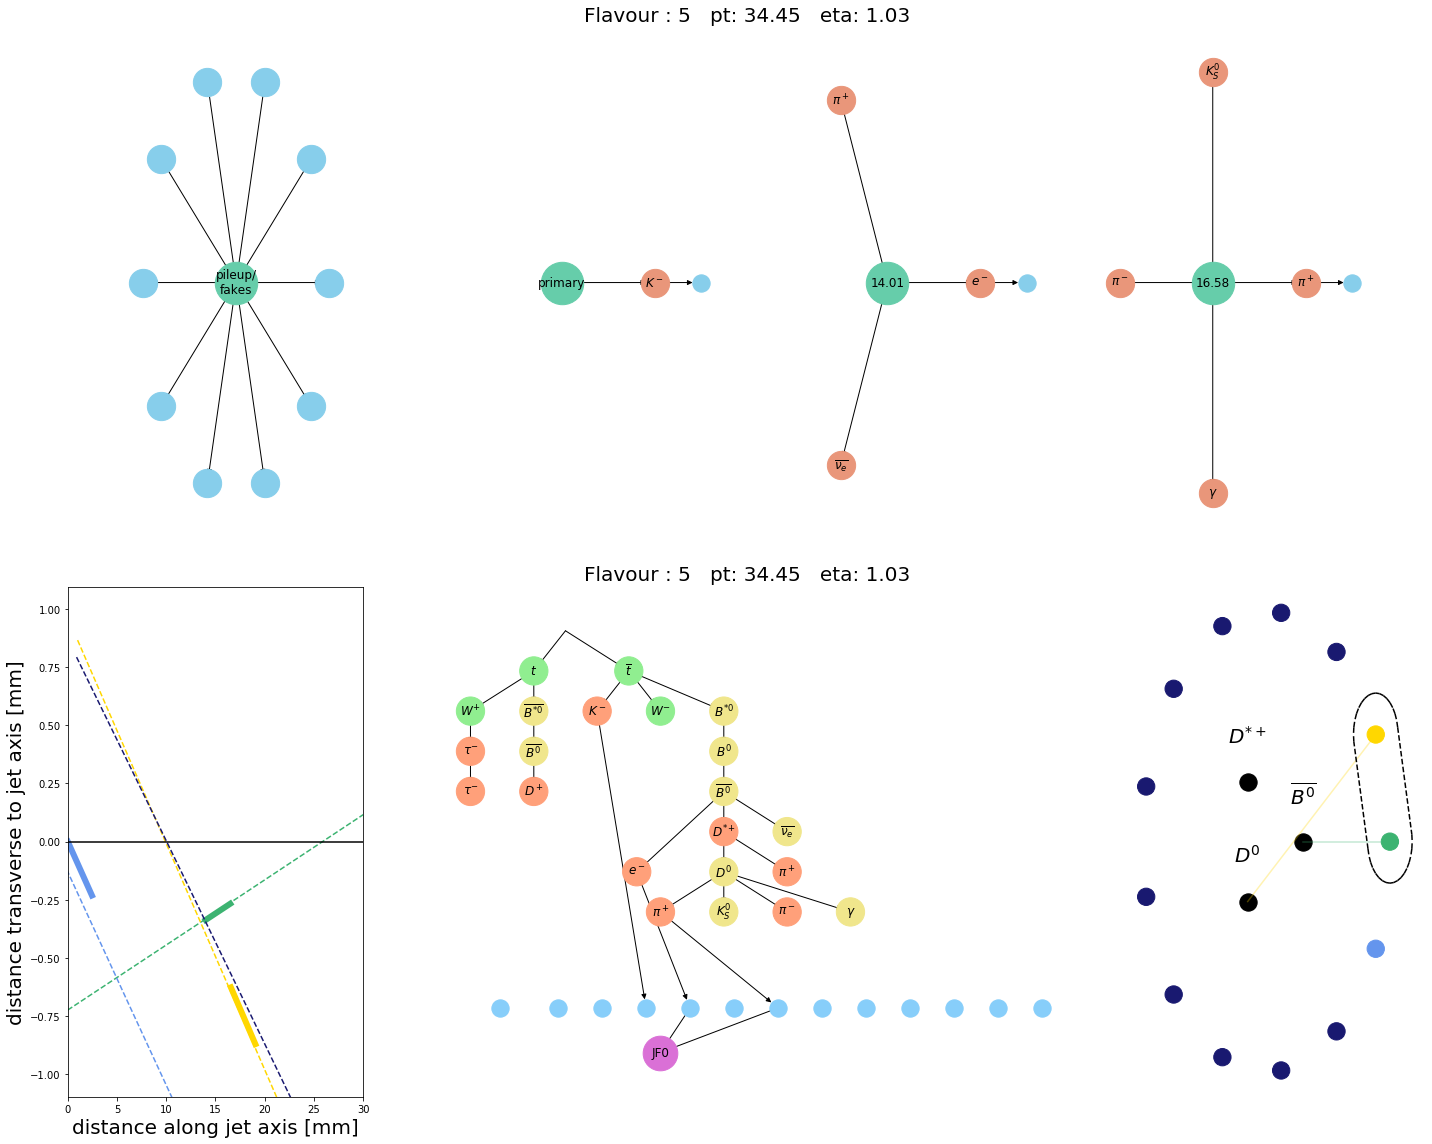

In [621]:
fig = plt.figure(figsize=(20,16))
gs = gridspec.GridSpec(2, 4)


ax_i = plt.subplot(gs[0,:])
ax_j = plt.subplot(gs[0+1,0])
ax_k = plt.subplot(gs[0+1,1:3])
ax_m = plt.subplot(gs[0+1,3:])


ax_i.set_axis_off()

jet_graph = df.iloc[13]
full_graph = build_jet_graph(jet_graph,merging_dist=0)

reco_g = full_graph.get_reco_graph()
reco_g.sort_nodes()

x,y = create_single_batch(reco_g)
output = j_gnn(x[0],x[1],x[2])

create_graph_plot(reco_g,ax_m)

plot_locations(full_graph,ax_i)

plot_tree_graph(jet_graph,ax_k)

plot_graph_jet_image(reco_g,ax_j)


pt = jet_graph.jet_pt
eta = jet_graph.jet_eta
flav = jet_graph.jet_DoubleHadLabel

ax_i.set_title('Flavour : '+str(flav)+'   pt: '+'{0:.2f}'.format(pt/1000.0)+'   eta: '+'{0:.2f}'.format(eta) ,
              fontsize=20)

plt.tight_layout()
plt.show()

In [622]:
np.argmax( output.data.numpy() ,axis=1 )

array([2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1])

In [623]:
y

tensor([2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])